In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('data/sac_find_best_matmul.csv')
df.drop('name', axis=1, inplace=True)

flop = df['size'] * df['size'] * (2 * df['size'] - 1)
df['MFLOP/J'] = (flop / 1e6) / df['energy']
df['GFLOP/s'] = (flop / 1e9) / df['runtime']
df['MFLOP/J SD'] = 0 * df['energysd'] # How to compute this?

df

,pin,size,threads,runtime,runtimesd,energy,energysd,MFLOP/J,GFLOP/s,MFLOP/J SD
0,True,500,1,0.154459,0.000138,2.386770,0.025006,104.639316,1.616932,0.0
1,True,500,2,0.162390,0.001210,2.591327,0.020763,96.379191,1.537964,0.0
2,True,500,3,0.104432,0.001706,2.011228,0.032286,124.177865,2.391509,0.0
3,True,500,4,0.078202,0.001963,1.584825,0.039805,157.588397,3.193634,0.0
4,True,500,5,0.061694,0.001883,1.444364,0.052283,172.913500,4.048180,0.0
...,...,...,...,...,...,...,...,...,...,...
347,False,1500,12,3.211053,0.070060,104.350030,1.753908,64.664572,2.101414,0.0
348,False,1500,13,2.933528,0.024743,105.212640,0.986433,64.134404,2.300217,0.0
349,False,1500,14,2.743748,0.051418,99.632416,1.403257,67.726452,2.459318,0.0
350,False,1500,15,2.641714,0.038911,104.064280,1.072491,64.842134,2.554308,0.0


In [84]:
def twin_plot(df, ax, bar_y, line_y, sd, bar_label=None, line_label=None, bar_min=True):
    if bar_label == None: bar_label = bar_y
    if line_label == None: line_label = line_y
    
    x = list(range(0, len(df)))
    
    sns.barplot(x=x, y=df[bar_y], label=bar_label, legend=False, ax=ax)
    axt = ax.twinx()
    sns.lineplot(x=x, y=df[line_y], label=line_label, legend=False, color='r', ax=axt)
    axt.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = axt.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=df[bar_y], yerr=df[sd], fmt='none', c='black')

    for bar in ax.patches:
        if ((bar_min and bar.get_height() == df[bar_y].min()) or
            (not bar_min and bar.get_height() == df[bar_y].max())):
            bar.set_color('g')
            break

    ax.set_ylabel(bar_label)
    axt.set_ylabel(line_label)

    return axt

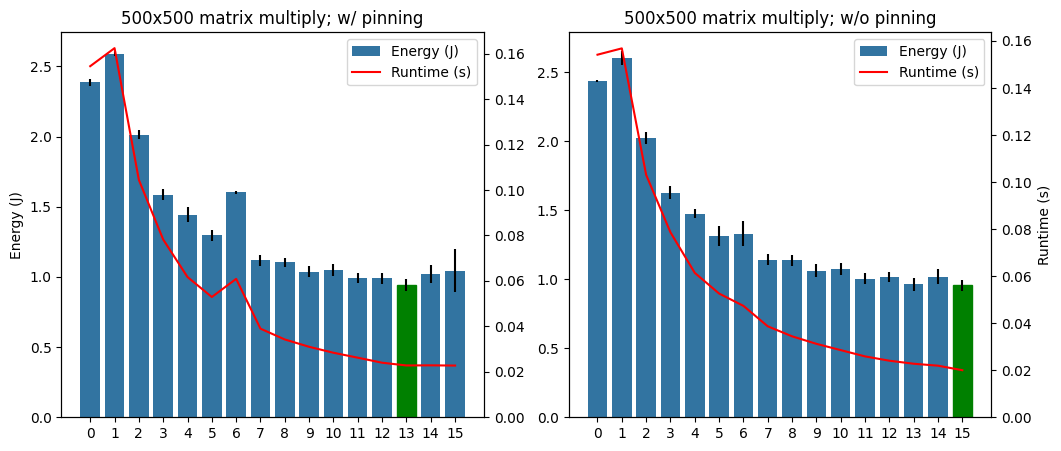

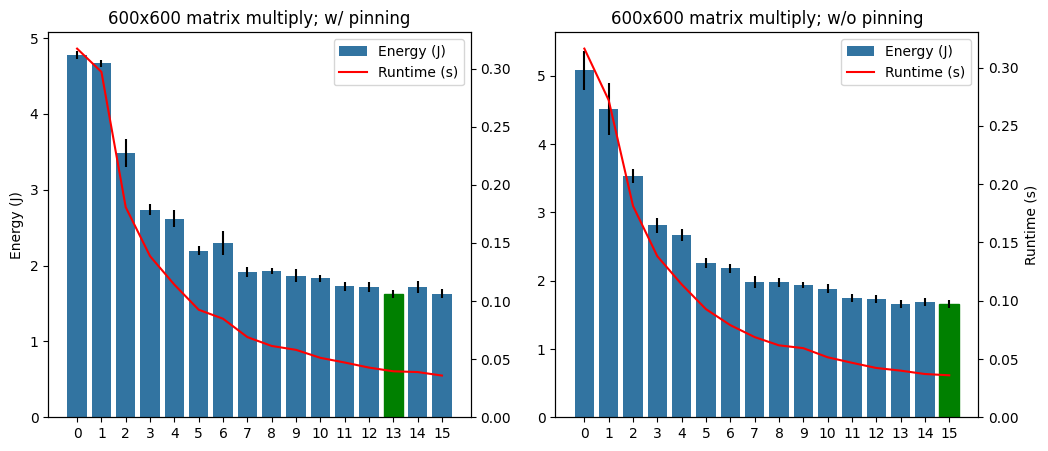

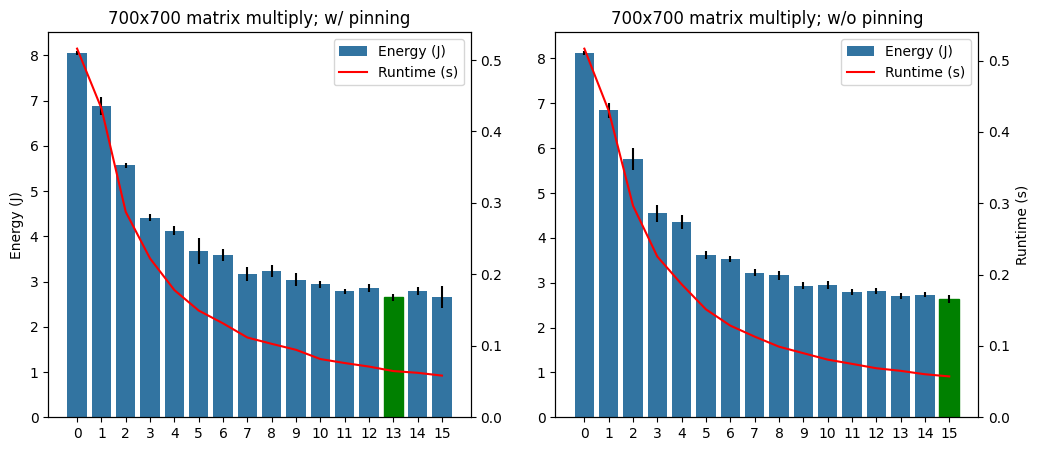

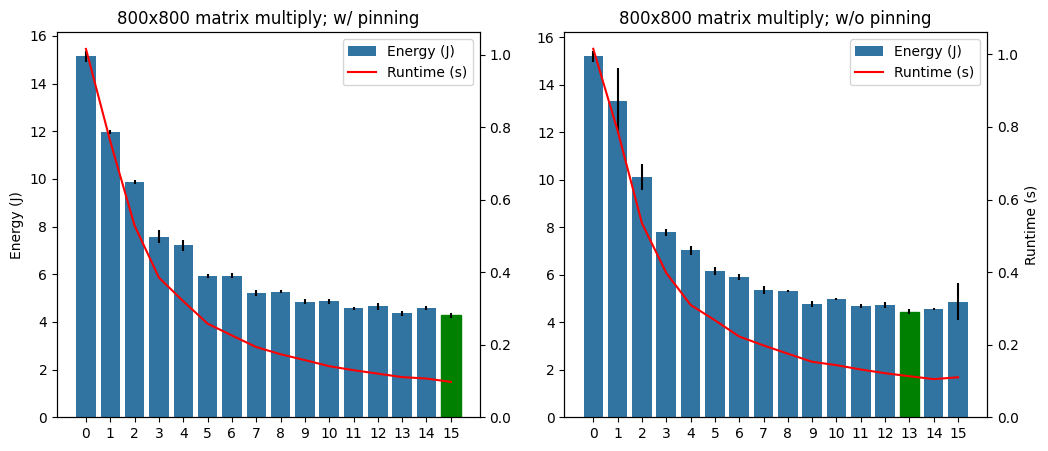

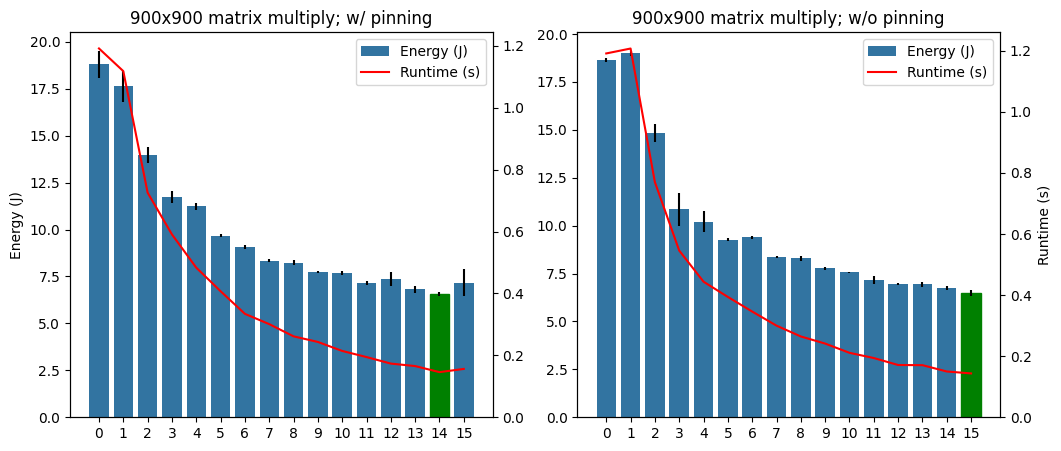

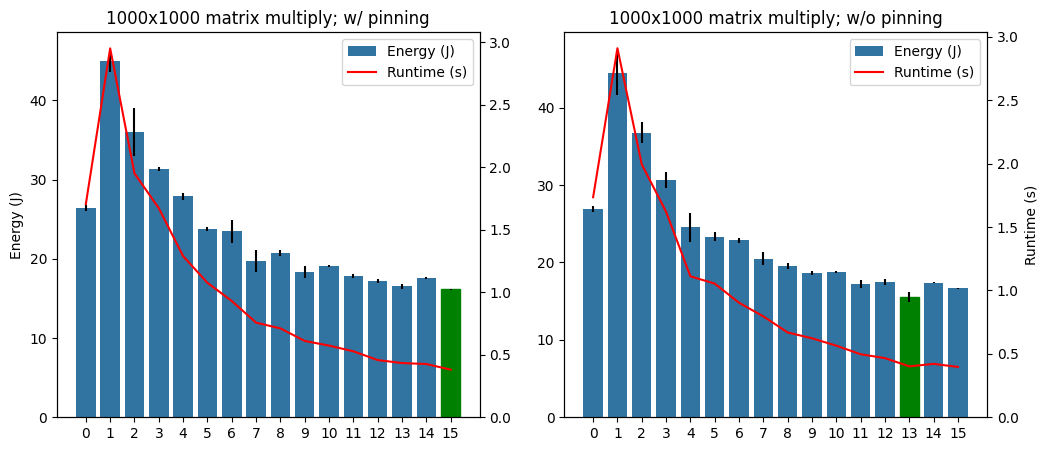

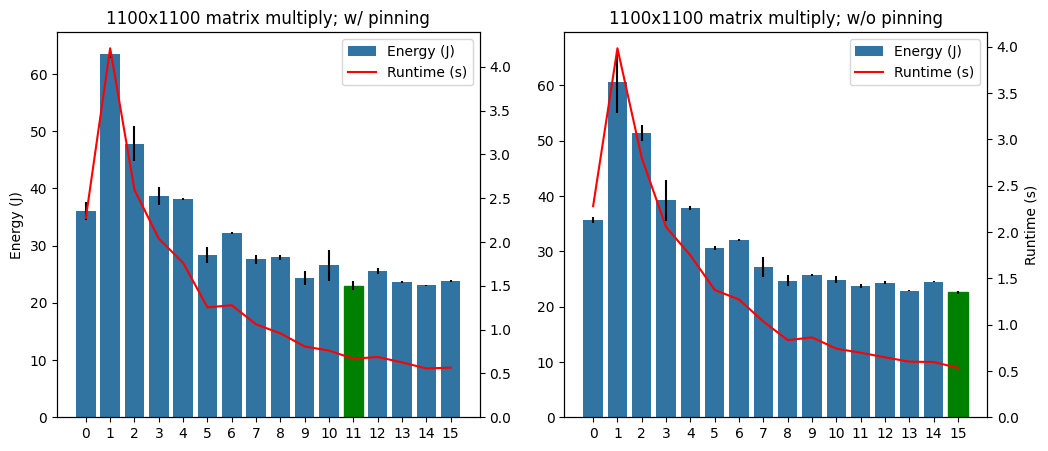

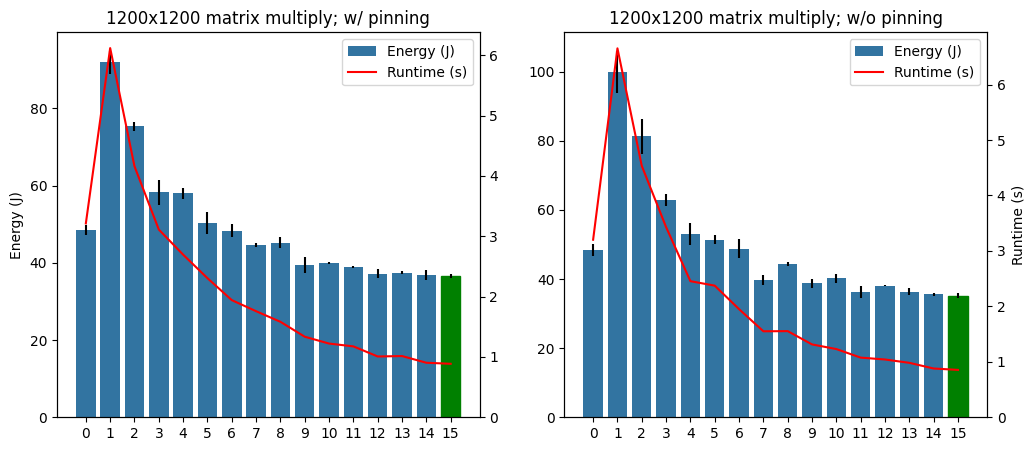

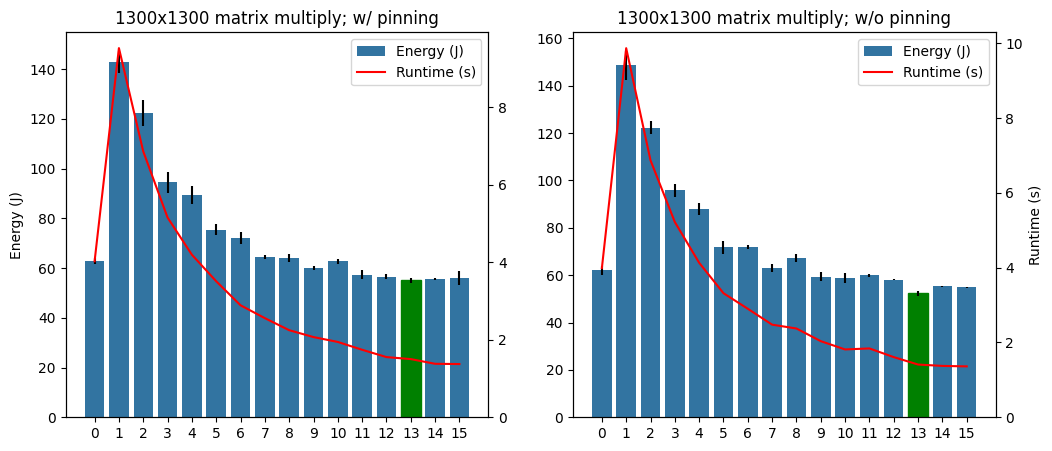

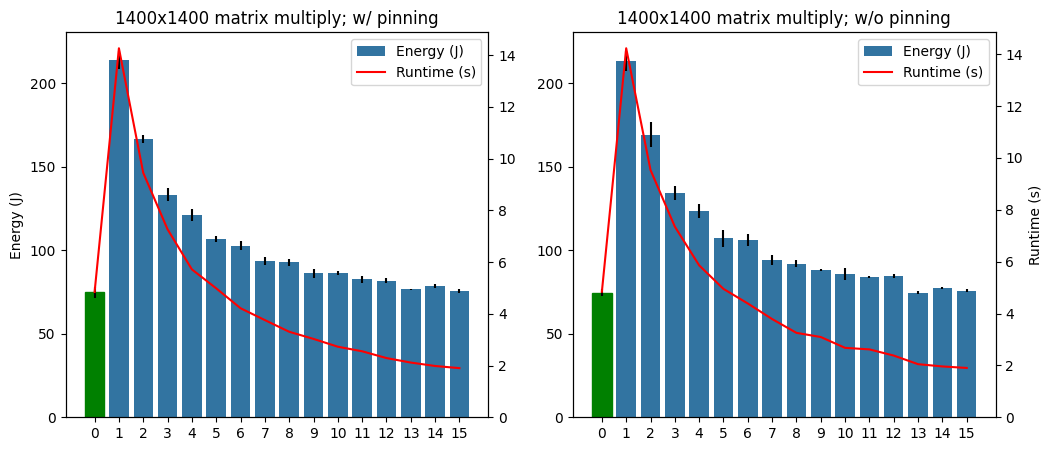

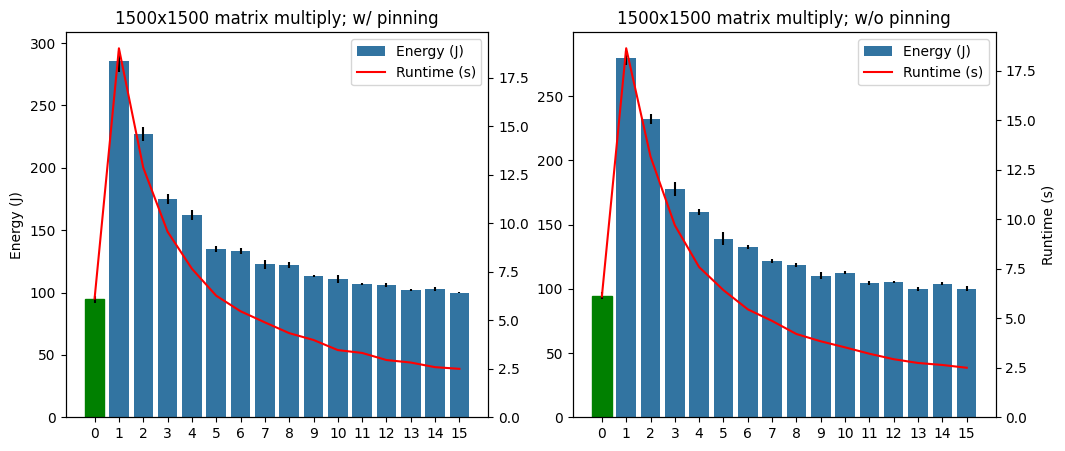

In [85]:
for size, dfx in df.groupby('size'):
    w_pin = dfx[dfx['pin'] == True]
    wo_pin = dfx[dfx['pin'] == False]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    axt = twin_plot(w_pin, ax1, 'energy', 'runtime', 'energysd', 'Energy (J)', 'Runtime (s)')
    twin_plot(wo_pin, ax2, 'energy', 'runtime', 'energysd', 'Energy (J)', 'Runtime (s)')
    axt.set_ylabel('')
    ax2.set_ylabel('')

    ax1.set_title(f'{size}x{size} matrix multiply; w/ pinning')
    ax2.set_title(f'{size}x{size} matrix multiply; w/o pinning')

plt.show()

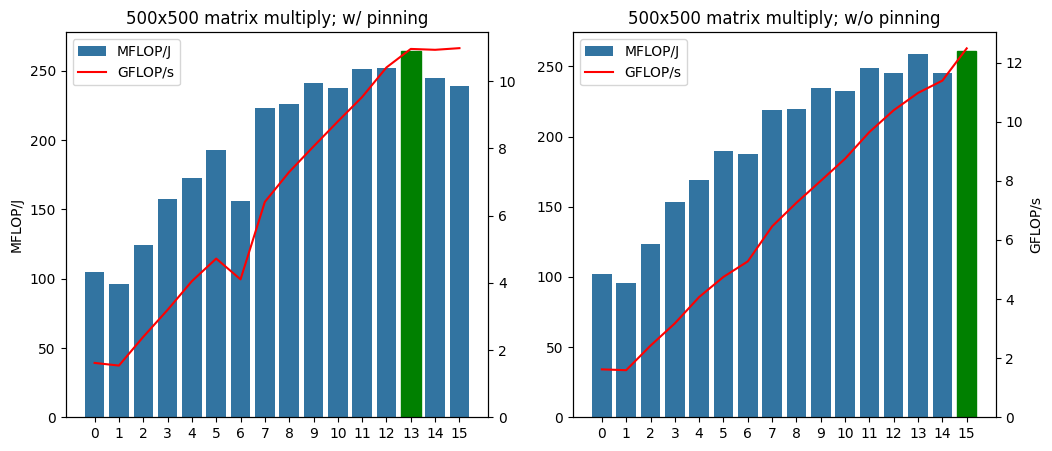

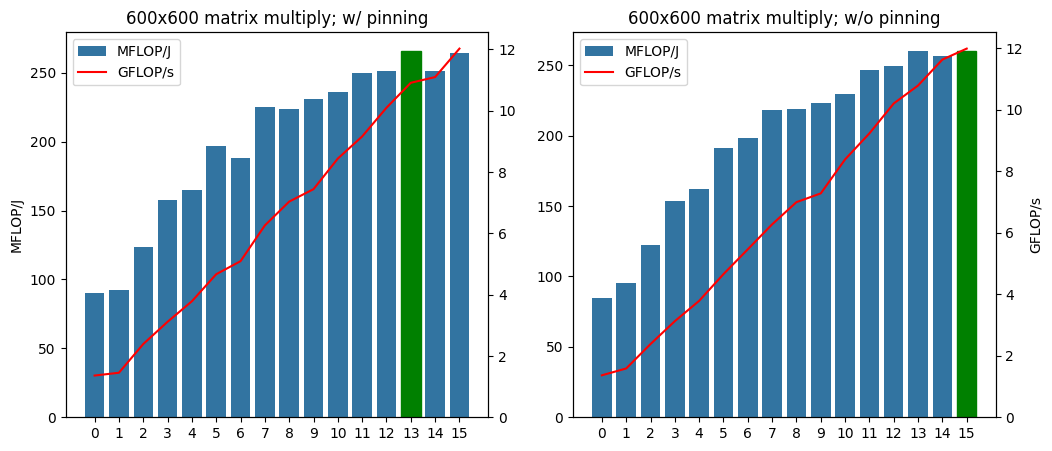

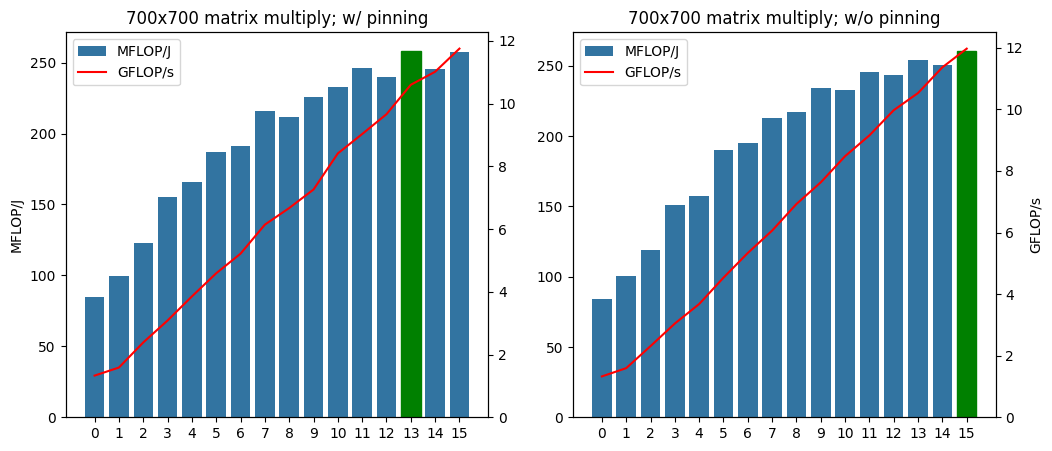

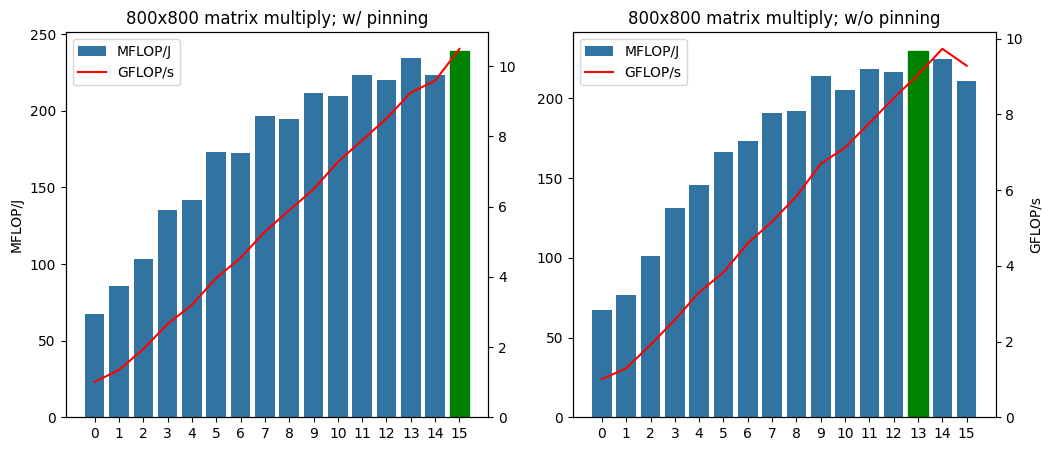

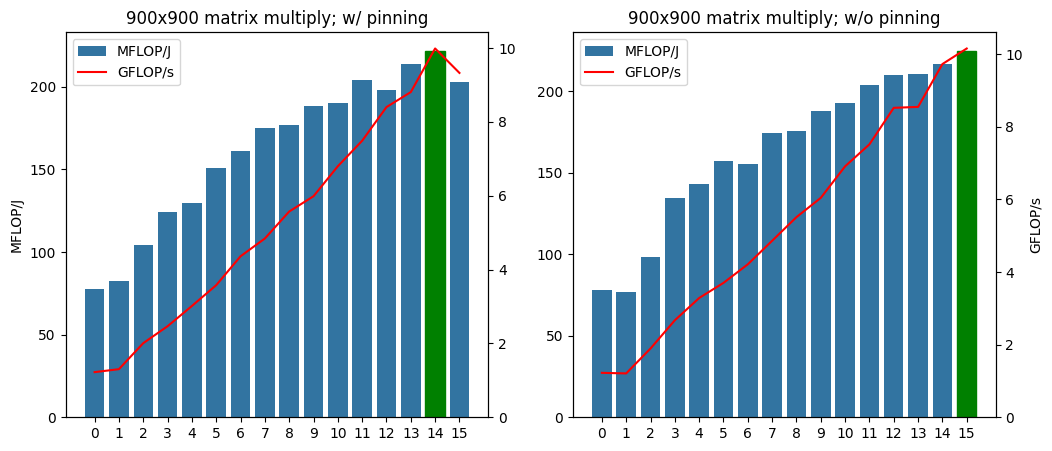

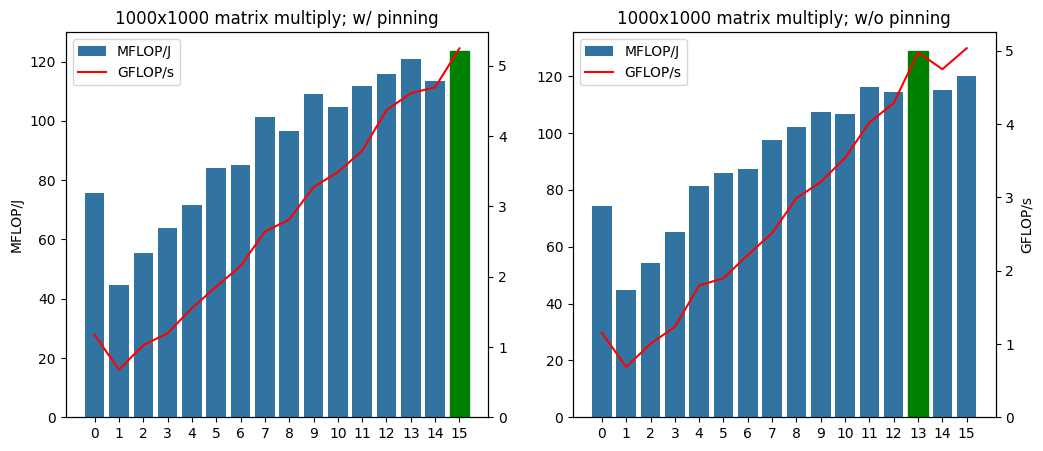

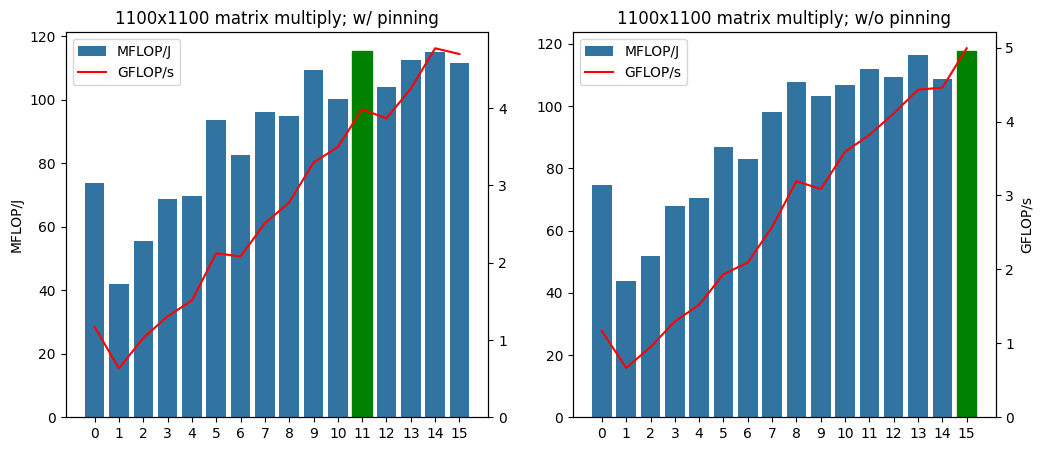

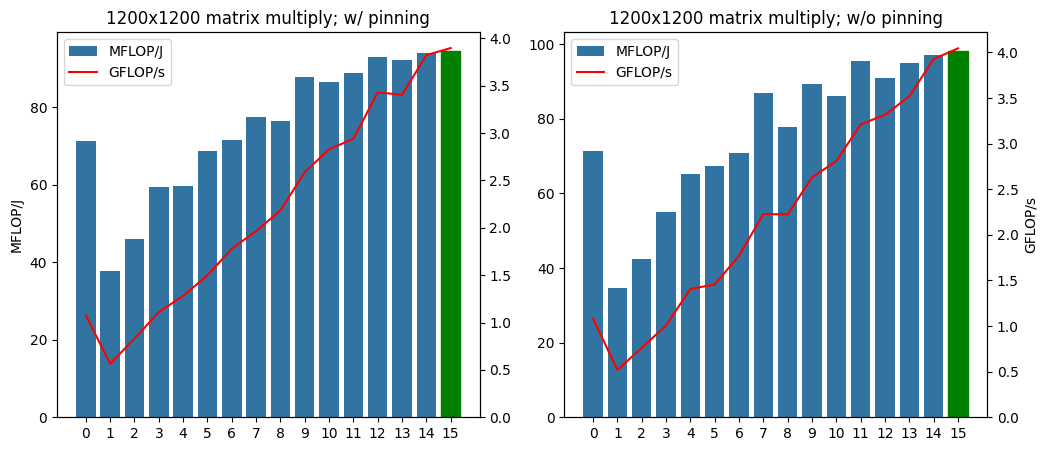

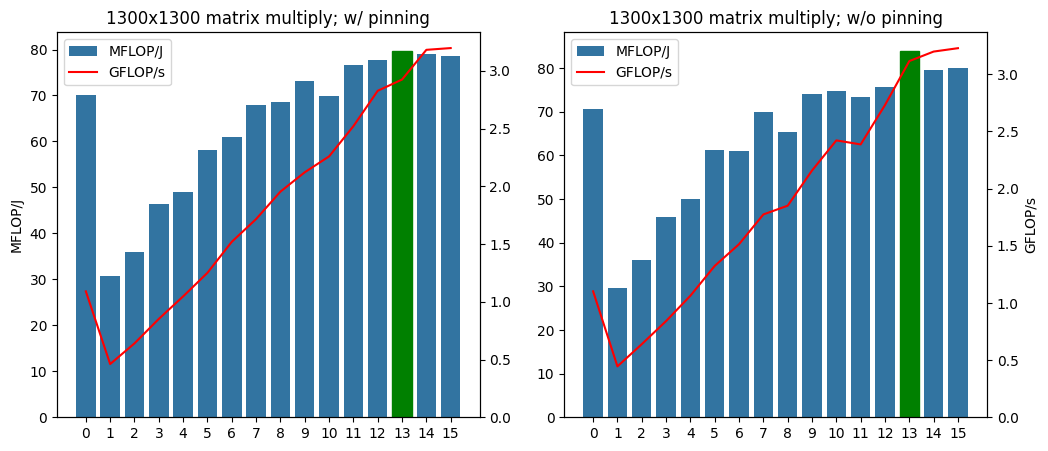

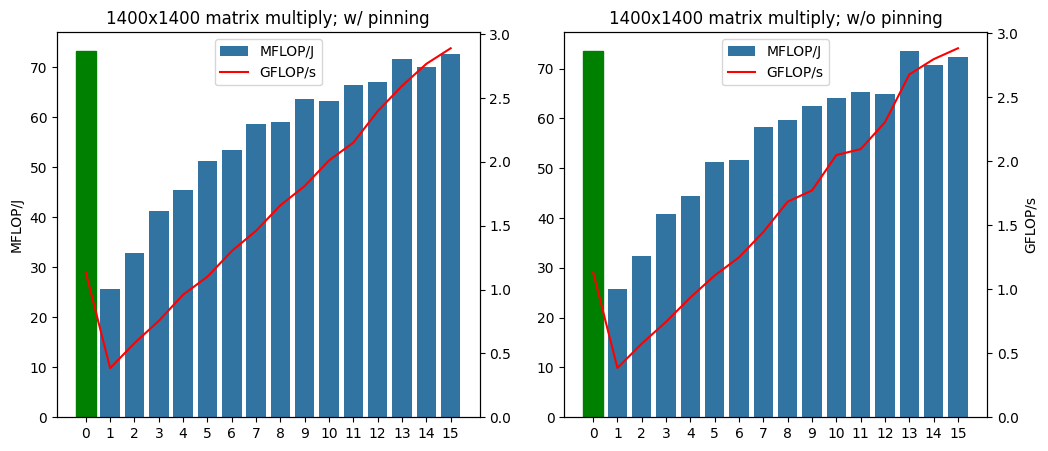

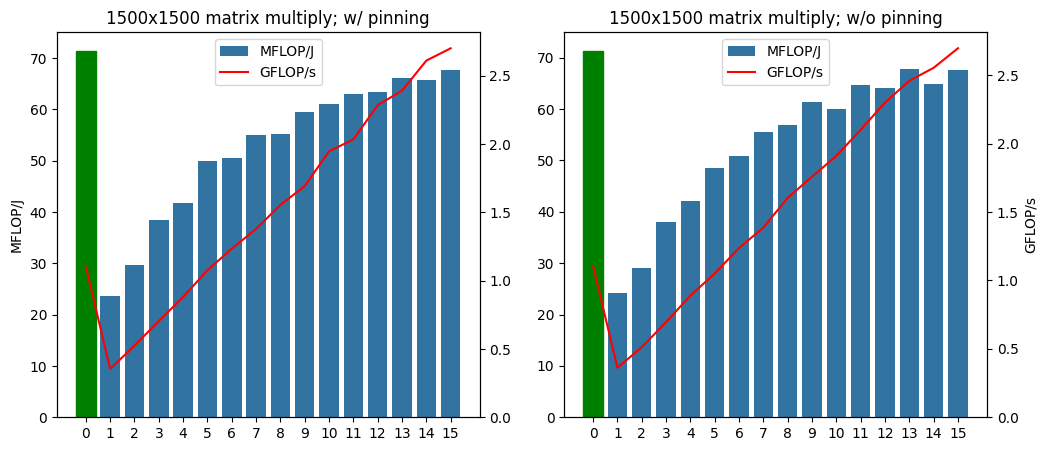

In [86]:
for size, dfx in df.groupby('size'):
    w_pin = dfx[dfx['pin'] == True]
    wo_pin = dfx[dfx['pin'] == False]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    axt = twin_plot(w_pin, ax1, 'MFLOP/J', 'GFLOP/s', 'MFLOP/J SD', bar_min=False)
    twin_plot(wo_pin, ax2, 'MFLOP/J', 'GFLOP/s', 'MFLOP/J SD', bar_min=False)
    axt.set_ylabel('')
    ax2.set_ylabel('')

    ax1.set_title(f'{size}x{size} matrix multiply; w/ pinning')
    ax2.set_title(f'{size}x{size} matrix multiply; w/o pinning')

plt.show()